In [1]:
import pandas as pd

In [2]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/gkrishna9790/Logistic-Regression-Binary-Classification/master/Archieve/banking.csv")

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
data.shape

(41188, 21)

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [6]:
categorical = [var for var in data.columns if data[var].dtype=='O']

In [7]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [8]:
cat_data = data[categorical]

In [9]:
numerical = [var for var in data.columns if data[var].dtype!='O']

In [10]:
num_data = data[numerical]

In [16]:
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


In [17]:
cat_data.shape

(41188, 10)

In [19]:
num_data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1


In [21]:
num_data.shape

(41188, 11)

In [15]:
for var in categorical: 
    print(data[var].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
cellular     26144
telephone    15044
Name: contact, dtype: int64
may    13769
jul     7174
aug     6178

In [17]:
for var in categorical: 
    print(data[var].value_counts()/np.float(len(data)))

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64
married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64
university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64
no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64
yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64
no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: f

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_7540/509963796.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(data[var].value_counts()/np.float(len(data)))
C:\Users\Toshiba\AppData\Local\Temp/ipykernel_7540/509963796.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(data[var].value_counts()/np.float(len(data)))
C:\Users\T

In [20]:
cat_data

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,high.school,unknown,no,yes,telephone,jun,thu,nonexistent
41184,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,nonexistent
41185,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,nonexistent
41186,technician,married,professional.course,no,no,yes,telephone,oct,tue,nonexistent


In [22]:
cat_data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [23]:
cat_data['education']=np.where(cat_data['education']=='basic.9y','Basic',cat_data['education'])
cat_data['education']=np.where(cat_data['education']=='basic.6y','Basic',cat_data['education'])
cat_data['education']=np.where(cat_data['education']=='basic.4y','Basic',cat_data['education'])

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_4312/1550778600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['education']=np.where(cat_data['education']=='basic.9y','Basic',cat_data['education'])
C:\Users\Toshiba\AppData\Local\Temp/ipykernel_4312/1550778600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['education']=np.where(cat_data['education']=='basic.6y','Basic',cat_data['education'])
C:\Users\Toshiba\AppData\Local\Temp/ipykernel_4312/1550778600.py:3: SettingWithCopyWarning: 

In [25]:
data['education']=np.where(data['education']=='basic.9y','Basic',data['education'])
data['education']=np.where(data['education']=='basic.6y','Basic',data['education'])
data['education']=np.where(data['education']=='basic.4y','Basic',data['education'])

In [24]:
data.education.nunique()

8

In [20]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [21]:
cat_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [22]:
cat_data.nunique()

job            12
marital         4
education       6
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
dtype: int64

In [23]:
cat_data.education.value_counts()

Basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [24]:
cat_data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [25]:
cat_data.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [26]:
cat_data.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [27]:
cat_data.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [28]:
cat_data.isna().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

In [29]:
data.education.nunique()

8

# Split train-test data

In [30]:
X = data.drop(['y'], axis=1)  #X = claims_1.drop(['fraudulent'],axis=1)

y = data['y']                 #y = Claims_1['fraudulent']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [32]:
X_train.shape, X_test.shape

((28831, 20), (12357, 20))

# Working on X-train data.

In [33]:
X_train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
dtype: object

In [34]:
X_train.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
dtype: int64

In [36]:
cat_var

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [37]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
31880,31,technician,single,university.degree,no,no,no,cellular,nov,tue,259,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8
38177,44,admin.,married,professional.course,no,yes,no,telephone,may,mon,300,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2459,43,management,married,professional.course,no,yes,no,telephone,may,mon,134,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
756,35,blue-collar,married,basic.4y,no,no,no,cellular,nov,tue,169,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8
11275,33,admin.,single,university.degree,no,yes,yes,cellular,may,thu,255,2,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1


In [38]:
X_train = pd.get_dummies(X_train,columns = cat_var)

In [39]:
X_train.shape

(28831, 63)

In [40]:
X_train.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
31880,31,259,1,999,1,-0.1,93.200,-42.0,4.153,5195.8,...,0,0,0,0,0,1,0,1,0,0
38177,44,300,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2459,43,134,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
756,35,169,2,999,0,-0.1,93.200,-42.0,4.153,5195.8,...,0,0,0,0,0,1,0,0,1,0
11275,33,255,2,999,1,-1.8,92.893,-46.2,1.266,5099.1,...,0,0,0,0,1,0,0,1,0,0


In [41]:
X_test = pd.get_dummies(X_test,columns = cat_var)
X_test.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
15500,51,104,4,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,1,0,0,0,0,1,0
29034,31,551,3,999,1,-1.8,93.075,-47.1,1.466,5099.1,...,0,0,0,1,0,0,0,1,0,0
11199,33,116,2,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,0,0,0,1,0,0,1,0
22247,29,100,1,999,0,1.4,94.465,-41.8,4.961,5228.1,...,0,0,0,1,0,0,0,0,1,0
27180,57,216,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0


In [42]:
X_test.shape

(12357, 63)

In [43]:
#from scipy import stats

In [44]:
#X_train_std = X_train.apply(stats.zscore)

In [45]:
#X_test_std = X_test.apply(stats.zscore)

In [46]:
#X_train_std.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
31880,-0.868828,0.004511,-0.568563,0.194985,1.678425,-0.108730,-0.640999,-0.319848,0.312264,0.402076,...,-0.133118,-0.117859,-0.485365,-0.507944,-0.518408,2.034957,-0.496735,2.922391,-2.498430,-0.185492
38177,0.378479,0.161835,-0.568563,0.194985,-0.352663,0.653670,0.726937,0.888945,0.717597,0.335670,...,-0.133118,-0.117859,-0.485365,1.968722,-0.518408,-0.491411,-0.496735,-0.342186,0.400251,-0.185492
2459,0.282532,-0.475135,-0.568563,0.194985,-0.352663,0.653670,0.726937,0.888945,0.717597,0.335670,...,-0.133118,-0.117859,-0.485365,1.968722,-0.518408,-0.491411,-0.496735,-0.342186,0.400251,-0.185492
756,-0.485041,-0.340834,-0.206544,0.194985,-0.352663,-0.108730,-0.640999,-0.319848,0.312264,0.402076,...,-0.133118,-0.117859,-0.485365,-0.507944,-0.518408,2.034957,-0.496735,-0.342186,0.400251,-0.185492
11275,-0.676935,-0.010837,-0.206544,0.194985,1.678425,-1.188796,-1.169910,-1.226443,-1.349946,-0.935734,...,-0.133118,-0.117859,-0.485365,-0.507944,1.928983,-0.491411,-0.496735,2.922391,-2.498430,-0.185492


In [47]:
X_test_std.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
15500,1.060593,-0.606552,0.516264,0.196411,-0.342263,-1.219639,-0.885371,-1.436763,-1.296560,-0.950970,...,-0.133383,-0.119856,-0.482050,1.936715,-0.505633,-0.501340,-0.494506,-0.332478,0.391738,-0.186184
29034,-0.859227,1.138613,0.157564,0.196411,1.654597,-1.219639,-0.885371,-1.436763,-1.261270,-0.950970,...,-0.133383,-0.119856,-0.482050,1.936715,-0.505633,-0.501340,-0.494506,3.007714,-2.552729,-0.186184
11199,-0.667245,-0.559702,-0.201135,0.196411,-0.342263,0.826993,0.580752,-0.483812,0.761272,0.836430,...,-0.133383,-0.119856,-0.482050,-0.516338,-0.505633,1.994654,-0.494506,-0.332478,0.391738,-0.186184
22247,-1.051209,-0.622169,-0.559835,0.196411,-0.342263,0.826993,1.532080,-0.288890,0.760694,0.836430,...,-0.133383,-0.119856,-0.482050,1.936715,-0.505633,-0.501340,-0.494506,-0.332478,0.391738,-0.186184
27180,1.636539,-0.169285,-0.559835,0.196411,-0.342263,-0.132366,-0.667975,-0.332206,0.216875,0.388887,...,-0.133383,-0.119856,2.074472,-0.516338,-0.505633,-0.501340,-0.494506,-0.332478,0.391738,-0.186184


# Building a Naive Bayes Model:
    

In [48]:
from sklearn.naive_bayes import GaussianNB  #Gaussian distribution/Normal distribution,so you don't have to do any transformation to achieve normal distribution , it is done automatically by the GaussianNB().
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [49]:
y_train_pred = gnb.predict(X_train)

In [50]:
y_train_pred = pd.Series(y_train_pred)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
Model_data_train = pd.DataFrame(y_train)

In [60]:
Model_data_train['y_pred'] = y_train_pred

In [61]:
Model_data_train

,y,y_pred
31880,0,0
38177,0,0
2459,0,0
756,0,0
11275,0,0
...,...,...
20757,0,0
32103,0,0
30403,1,0
21243,0,0


In [63]:
pd.crosstab(Model_data_train.y,Model_data_train.y_pred, margins = True)

y_pred,0,1,All
y,,,
0,23245,2322,25567
1,1595,1669,3264
All,24840,3991,28831


In [68]:
from sklearn.metrics import confusion_matrix

data_table = confusion_matrix(y_train, y_train_pred)

print('Confusion matrix\n\n', data_table)

print('\nTrue Positives(TP) = ', data_table[0,0])

print('\nTrue Negatives(TN) = ', data_table[1,1])

print('\nFalse Positives(FP) = ', data_table[0,1])

print('\nFalse Negatives(FN) = ', data_table[1,0])


data_table.shape

Confusion matrix

 [[23245  2322]
 [ 1595  1669]]

True Positives(TP) =  23245

True Negatives(TN) =  1669

False Positives(FP) =  2322

False Negatives(FN) =  1595


(2, 2)

<AxesSubplot:>

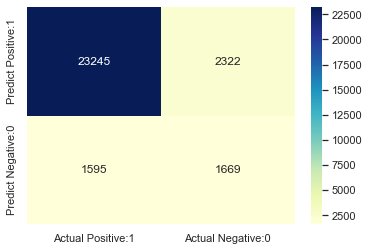

In [66]:
matrix = pd.DataFrame(data=data_table, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     25567
           1       0.42      0.51      0.46      3264

    accuracy                           0.86     28831
   macro avg       0.68      0.71      0.69     28831
weighted avg       0.88      0.86      0.87     28831



In [53]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

Model accuracy score: 0.8641


# Data Validation on X_test

In [54]:
y_test_pred = gnb.predict(X_test)

In [57]:
y_test_pred = pd.Series(y_test_pred)

In [56]:
print('Model test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred)))

Model test accuracy score: 0.8638


In [ ]:
pd.crosstab(matrix.Binary_attack, matrix.predict_attack, margins = True)